### Resolución de las Ecuaciones de Navier-Stokes por Elementos Finitos

#### Estabilización P1P1

Sea $\mathcal{T}_h$ una triangulación de $\Omega$, consideremos los siguientes subespacios:
\begin{align*}
    \textbf{P}_1&=\{\textbf{v}\in (C(\overline{\Omega}))^2: \, v_i|_{K}\in \mathcal{P}_1(K), i=1,2, \ \forall K\in\mathcal{T}_h\}\\
    P_1&=\{ v\in C(\overline{\Omega}): \, v|_{K}\in \mathcal{P}_1(K), \ \forall K\in\mathcal{T}_h\}
\end{align*}

Sea $(\textbf{u}_h,p_h)\in \textbf{V}_h\times Q_h$ la solución del problema y llamemos $n=dim(\textbf{V}_h)$ y $m=dim(Q_h)$.

Como utilizaremos aproximaciones nodales,
podemos escribir a $\textbf{u}_h$ y $p_h$ como
\begin{align*}
    \textbf{u}_h&=\sum_{i=1}^n (u_1)_i(\beta_i,0)+\sum_{i=1}^n(u_2)_i(0,\beta_i),\\
    p_h&=\sum_{j=1}^m p_j\beta_j,
\end{align*}
donde las las $\beta_i$ son las clásicas bases de Lagrange. Sea $T\in T_h$ un elemento, que en nuestro caso será un triángulo, denotamos por $(x_0,y_0)$, $(x_1,y_1)$ y $(x_2,y_2)$ los vértices de $T$. Definimos las bases en cada elemento tal que
\begin{equation}
    \beta_i(x_j,y_j)=\left\{
	       \begin{array}{ll}
		 0      & \mathrm{si\ } i\neq j \\
		 1 & \mathrm{si\ } i=j.
	       \end{array}
	     \right.
\end{equation}

Sabemos que $(\textbf{u}_h,p_h)$ es solución de un problema de la forma

\begin{align*}
\left\lbrace
\begin{array}{rl}
a(\textbf{u}_{h},\textbf{v}_{h})+c(\textbf{u}_h,\textbf{u}_h,\textbf{v}_h)+b(\textbf{v}_{h},p_{h}) &=(\textbf{f},\textbf{v}_{h}) \ \ \forall \ \textbf{v}_{h}\in \textbf{V}_h\\
b(\textbf{u}_{h},q_{h})-G(p_{h},q_{h}) &=0 \ \ \ \ \ \ \ \ \ \forall \ q_{h}\in Q_{h}.
\end{array}
\right.
\end{align*}

Para resolver el problema no lineal usaremos la técnica de punto fijo la cual consiste en lo siguiente: Se toma una función inicial $\textbf{u}^0$ y se resuelve el siguiente sistema lineal
\begin{align*}
\left\lbrace
\begin{array}{rl}
a(\textbf{u}_{h},\textbf{v}_{h})+c(\textbf{u}^0,\textbf{u}_h,\textbf{v}_h)+b(\textbf{v}_{h},p_{h}) &=(\textbf{f},\textbf{v}_{h}) \ \ \forall \ \textbf{v}_{h}\in \textbf{V}_h\\
b(\textbf{u}_{h},q_{h})-G(p_{h},q_{h}) &=0 \ \ \ \ \ \ \ \ \ \forall \ q_{h}\in Q_{h}.
\end{array}
\right.
\end{align*}

Este problema es equivalente a resolver el sistema

\begin{equation}
    \textbf{K}\cdot \textbf{x} = \textbf{b},
\end{equation}
donde $\textbf{K}\in\mathbb{R}^{2n+m\times 2n+m}$, $\textbf{x}\in\mathbb{R}^{2n +m\times 1}$ y $\textbf{b}\in\mathbb{R}^{2n+m\times 1}$ definidos de la siguiente manera:
\begin{equation}
    \textbf{K}= \left(
\begin{array}{ccc}
AC & 0 & B_1 \\
0 & AC & B_2\\
B_1^T & B_2^T & -G
\end{array}
\right)
\end{equation}

con $AC=A+C$, donde $A$ y $C$ son las matrices asociadas a los operadores $a(\cdot,\cdot)$ y $c(\textbf{u}_0,\cdot,\cdot)$ respectivamente. $B_1$ y $B_2$ corresponden al operador $b(\cdot,\cdot)$ y $G$ al operador $G(\cdot,\cdot)$.

### Ejemplo (Cavity flow):

$\textbf{f}=(0,0)$

In [ ]:
#librerias
import matplotlib.pyplot as plt
from lib_fem_mixtos import *

: 

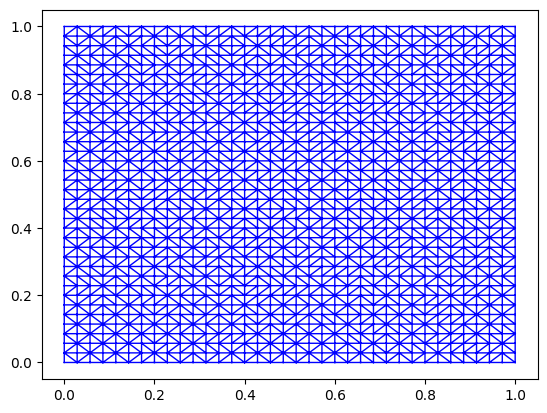

In [3]:
#armo la malla y defino los elementos y nodos
N=36
mu=1
ejemplo="Cavity"
T,nodos,elem = rect_mesh([0,1],[0,1], N, N)
borde=Boundary(T)

plt.triplot(nodos[:,0], nodos[:,1], T.simplices,"b-",lw=1)
plt.show()

In [4]:
#dato incial
w=np.zeros(2*len(T.points))

#metodo de punto fijo
iteraciones=8
i=0
while i<iteraciones:
    uh,ph=solver(T,nodos,borde,elem,mu,w,ejemplo)
    w=uh
    i=i+1

X=nodos[:,0]
Y=nodos[:,1]

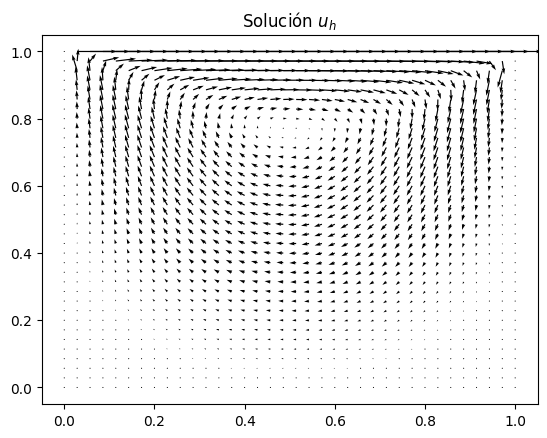

In [5]:
#Grafico de u_h
n=len(nodos[:,0])

uh_1=uh[0:n]
uh_2=uh[n:2*n]

fig1, ax1 = plt.subplots()
ax1.set_title('Solución $u_h$')
Q = ax1.quiver(X, Y, uh_1, uh_2, units='width')

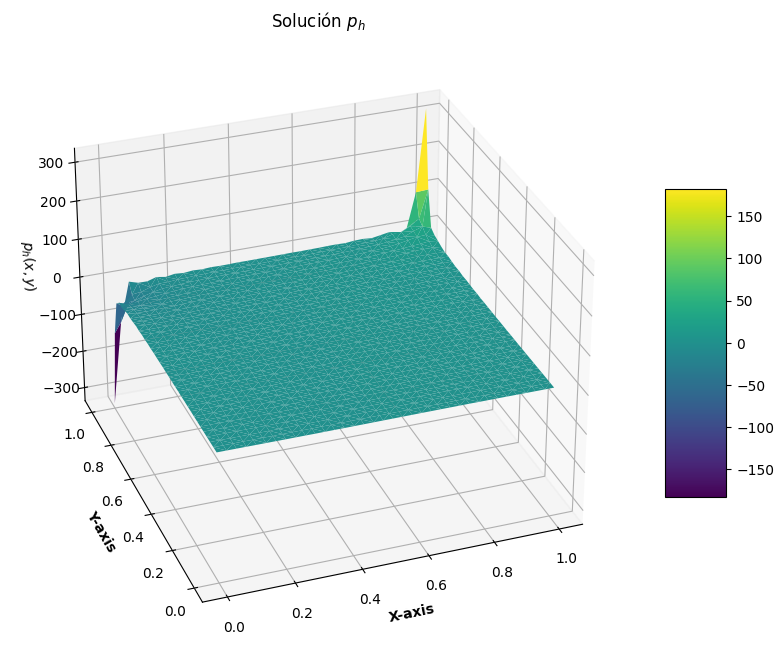

In [7]:
#Grafico de p_h

# Creating figure
fig = plt.figure(figsize =(10, 8))
ax = plt.axes(projection ='3d')

# Creating color map
my_cmap = plt.get_cmap('viridis')

# Creating plot
trisurf = ax.plot_trisurf(X, Y, ph,
                         cmap = my_cmap)#,
                         #linewidth = 0.2,
                         #antialiased = True,
                         #edgecolor = 'grey')
fig.colorbar(trisurf, ax = ax, shrink = 0.5, aspect = 5)
ax.set_title('Solución $p_h$')

# Adding labels
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('$p_h(x,y)$', fontweight ='bold')

ax.view_init(30, 250)
# show plot
plt.show()



In [ ]:
#https://matplotlib.org/stable/gallery/color/colormap_reference.html